# 002 - POO e outros fundamentos com Python

## Fundamentos de ETL (Extract, Transform, Load) com Python (por Diego Bruno)
- ETL é um tipo de data integration em três etapas (extração, transformação, carregamento) usado para combinar dados de diversas fontes. Ele é comumente utilizado para construir um data warehouse. 
- Existem muitas ferramentas de ETL disponíveis no mercado como: IBM Information Server (Data Stage), o Oracle Data Integrator (ODI), o Informatica Power Center, o Microsoft Integration Services (SSIS). Existe também um conjunto de Ferramentas de ETL Open Source como o PDI – Pentaho Data Integrator e Talend ETL
- Na etapa de extração acontece a importação dos dados (de diversos tipos)
- Na etapa de transformação ocorre a transformação em listas, colunas, tipos de dados, etc
- A etapa de Carregamento é a definição do modelo de dados para análise
- Os dados ficam em zonas temporárias entre cada etapa, o resultado permite comparação com uma versão prévia
- A transformação inclui limpeza, racionalização e complementação dos registros. O processo de limpeza removerá erros e padronizará as informações. O processo de complementação implicará no acréscimo de dados.
- Entre as vantagens da ETL se encontram a garantia significativa da qualidade dos dados, funcionalidade de execução, desenvolvimento das cargas, manutenção das cargas, performance, transferência, conectividade, reinicialização, segurança e estabilidade
- Algumas das ferramentas de ETL são IBM Data Stage, Power Center, Sql Server Integration Services e Talend ETL.
- No caso de Big Data temos a plataforma Hadoop e ferramentas como SQOOP, HIVE, PIG e SPARK

- A biblioteca `Pandas` permite uma manipulação de dados estruturadas bem parecida com o Excel.
- Permite trabalhar com  dados tabulares, ordenados de forma temporal ou não, matrizes e qualquer outro tipo de conjunto de dados
- Os principais objetos na biblioteca são `Series` e `DataFrames`
  - Uma `Serie` é uma matriz unidimensional que contém uma sequência de valores com uma indexação(inteira ou com rótulos), similar a uma coluna do Excel
  - o `DataFrame` é uma estrutura de dados tabular onde tanto as linhas quanto as colunas representam rótulos.

- A biblioteca `Scikit-learn` é uma biblioteca de machine learning
- Dispõe de ferramentas simples e eficientes para análise preditiva de dados
- Foi consturída sobre os pacotes `NumPy`, `SciPy` e `matplotlib`

In [3]:
from sklearn.datasets import make_regression
#gerando uma massa de dados:
x, y = make_regression(n_samples=200, n_features=1, noise=30)

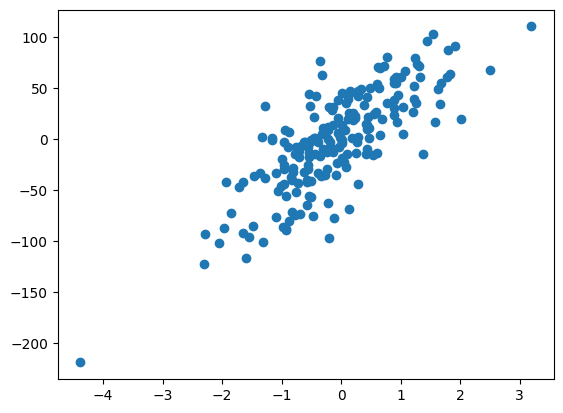

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
# Criação do modelo
modelo = LinearRegression()


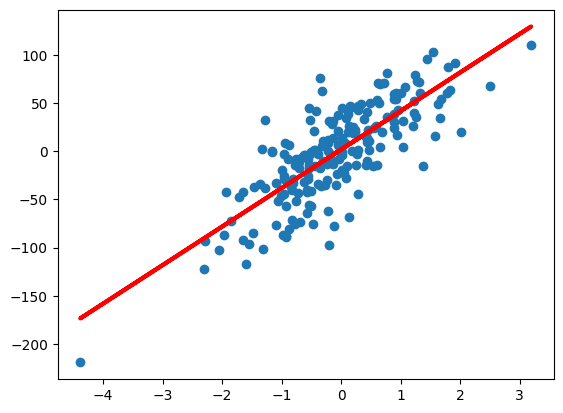

In [21]:
modelo.fit(x,y)
plt.scatter(x,y)
plt.plot(x, modelo.predict(x), color='red', linewidth=3)
plt.show()

- Luigi é um framework criado pelo Spotify para a criação de pipelines em Python. Ele lida com resolução de dependências, gerenciamento de fluxo de trabalho, visualização, tratamento de falhas, integração de linha de comando e muito mais.
- `target` é um alvo para a saída de uma tarefa (como um arquivo SQL por exemplo)
- `Task` é onde o trabalho ocorre e é representada por uma classe python com alguns elementos obrigatórios.
  - `require()`- Esta função membro da classe task contém todas as instâncias de tarefas que devem ser executadas antes da tarefa atual. 
  - `output()`- Este método contém o destino onde a saída da tarefa será armazenada. Isso pode conter um ou mais objetos de destino.
  - `run()` - Este método contém a lógica real para executar uma tarefa.
- Possui uma interface web para ajudar no gerenciamento das tarefas.

## Introdução à Programação Orientada a Objetos (POO) com Python (Guilherme Carvalho)
- O paradigma de OO estrutura o código abstraindo problemas do mundo real e os tornado mais modulares e extensíveis. Os seus conceitos-chave são Classes e Objeto
- Classes são a definição das características e comportamentos
- Objetos são as instanciações das classes
- Usamos a função `__init__` para definir o Construtor em python.
- `__str__() ` define a representação em string, sem ela é printado apenas o endereço do objeto.
- `__del__()` permite a definição do destrutor 
- Por convenção, usamos `self` como primeiro parâmetro em métodos na classe.
- `_class_` se refere a classe da qual o objeto foi criado
- Podemos ver todos os atributos e métodos disponíveis em um objeto com `dir(objeto)`

In [30]:
class MyClass:
  x = 5
p1 = MyClass()
print(p1.x)
print(p1)

5


In [2]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    def __str__(self):
        return f"{self.name}({self.age})"
    def __del__(self):
        print(f"Destruindo uma instância de {self.__class__.__name__}")

p1 = Person("John", 36)

print(p1)
del p1

John(36)
Destruindo uma instância de Person


## Aprendendo o Conceito de Herança com Python
- Em programação herança é a capacidade de uma classe filha derivar ou herdar as características e comportamentos da classe pai(base).
- Permite a reutilização de código, com a adição de recursos sem modificar uma classe e é de natureza transitiva
- a keyword `pass` é usada quando não queremos adicionar outros métodos ou atributos
- Python implementa herança múltipla
- Os métodos da classe filha sobrepõem a da classe pai, usa-se `super()` quando se quer utlizar um método da classe pai, ou especicamos com o nome da classe.
- O `super()` também funciona em herança múltipla, devido ao conceito de Method Resolution Order em python.

In [ ]:
class A:
    pass
class B:
    pass
class C(A,B):
    pass

In [4]:
class Student(Person):
  def __init__(self, fname, lname, year):
    super().__init__(fname, lname)
    #Person.__init__(self, fname, lname) # <- quivalente
    self.graduationyear = year
  def welcome(self):
    print("Welcome", self.firstname, self.lastname, "to the class of", self.graduationyear)

x = Student("Mike", "Olsen", 2019)

In [5]:
class Animal:
    def __init__(self, nro_patas):
        self.nro_patas = nro_patas

    def __str__(self):
        return f"{self.__class__.__name__}: {', '.join([f'{chave}={valor}' for chave, valor in self.__dict__.items()])}"


class Mamifero(Animal):
    def __init__(self, cor_pelo, **kw):
        self.cor_pelo = cor_pelo
        super().__init__(**kw)


class Ave(Animal):
    def __init__(self, cor_bico, **kw):
        self.cor_bico = cor_bico
        super().__init__(**kw)


class Gato(Mamifero):
    pass


class Ornitorrinco(Mamifero, Ave):
    def __init__(self, cor_bico, cor_pelo, nro_patas):
        super().__init__(cor_pelo=cor_pelo, cor_bico=cor_bico, nro_patas=nro_patas)


gato = Gato(nro_patas=4, cor_pelo="Preto")
print(gato)

ornitorrinco = Ornitorrinco(nro_patas=2, cor_pelo="vermelho", cor_bico="laranja")
print(ornitorrinco)

Gato: cor_pelo=Preto, nro_patas=4
Ornitorrinco: cor_pelo=vermelho, cor_bico=laranja, nro_patas=2


In [6]:
class Foo:
    def hello(self):
        print(self.__class__.__name__.lower())


class Bar(Foo):
    def hello(self):
        return super().hello()


bar = Bar()
bar.hello()

bar


## Aplicando Encapsulamento em Python
- Encapsulamento é o conceito de agrupar dados e métodos que manipulam um objeto em uma unidade, restringindo o acesso para evitar alterações acidentais.
- Não há keywords para restrição de acesso em Python, se usa convenções no lugar.
- Usa-se  `_` underline no início do nome para definir que um método ou variável é privado.

In [8]:
class Conta:
    def __init__(self, nro_agencia, saldo=0):
        self._saldo = saldo
        self.nro_agencia = nro_agencia

    def depositar(self, valor):
        self._saldo += valor

    def sacar(self, valor):
        self._saldo -= valor

    def mostrar_saldo(self):
        return self._saldo

conta = Conta("0001", 100)
conta.depositar(100)
print(conta.nro_agencia)
print(conta.mostrar_saldo()) # print(conta._saldo) funcionaria, mas é contra a convenção

0001
200
200


- `property()` servem para criar atributos gerenciados, modificam a implementação interna sem alterar a API pública da classe.
- Basicamente transforma uma função num novo atributo.
- A ideia no Python é que se não há nenhuma regra, não é necessário criar métodos (como getters and setters) desnecessariamente

In [14]:
class Foo:
    def __init__(self, x=None):
        self._x = x

    @property
    def x(self):
        return self._x or 0

    @x.setter
    def x(self, value):
        self._x += value

    @x.deleter
    def x(self):
        self._x = 0


foo = Foo(10)
print(foo.x)
del foo.x
print(foo.x)
foo.x = 10
print(foo.x)

10
0
10


In [10]:
class Pessoa:
    def __init__(self, nome, ano_nascimento):
        self.nome = nome
        self._ano_nascimento = ano_nascimento

    @property
    def idade(self):
        _ano_atual = 2022
        return _ano_atual - self._ano_nascimento


pessoa = Pessoa("Guilherme", 1994)
print(f"Nome: {pessoa.nome} \tIdade: {pessoa.idade}")

Nome: Guilherme 	Idade: 28


## Conhecendo Polimorfismo em Python
- Polimorfismo é a ideia de usar uma mesma função com assinatura diferentes
- Podemos usar junto com a herança para alterar o método herdado, portanto, não é possível polimorfismo sem herança.

In [ ]:
# len() being used for a string
print(len("geeks"))
 
# len() being used for a list
print(len([10, 20, 30]))

In [15]:
class Passaro:
    def voar(self):
        print("Voando...")


class Pardal(Passaro):
    def voar(self):
        print("Pardal pode voar")


class Avestruz(Passaro):
    def voar(self):
        print("Avestruz não pode voar")


# NOTE: exemplo ruim do uso de herança para "ganhar" o método voar
class Aviao(Passaro):
    def voar(self):
        print("Avião está decolando...")


def plano_voo(obj):
    obj.voar()


plano_voo(Pardal())
plano_voo(Avestruz())
plano_voo(Aviao())

Pardal pode voar
Avestruz não pode voar
Avião está decolando...


In [19]:
class India():
    def capital(self):
        print("New Delhi is the capital of India.")
 
    def language(self):
        print("Hindi is the most widely spoken language of India.")
 
    def type(self):
        print("India is a developing country.")
 
class USA():
    def capital(self):
        print("Washington, D.C. is the capital of USA.")
 
    def language(self):
        print("English is the primary language of USA.")
 
    def type(self):
        print("USA is a developed country.")
 

for country in (India(), USA()):
    country.capital()
    country.language()
    country.type()

New Delhi is the capital of India.
Hindi is the most widely spoken language of India.
India is a developing country.
Washington, D.C. is the capital of USA.
English is the primary language of USA.
USA is a developed country.


## Ampliando o conhecimento em POO com Python
- Todos os objetos nascem com o mesmo número de atributos de classe e de instância. 
- Atributos de instância são diferentes para cada objeto, enquanto atributos de classes são compartilhados entre todos eles.
- `self` é usado para uma instância

In [20]:
class Estudante:
    escola = "DIO"

    def __init__(self, nome, matricula):
        self.nome = nome
        self.matricula = matricula

    def __str__(self) -> str:
        return f"{self.nome} - {self.matricula} - {self.escola}"


def mostrar_valores(*objs):
    for obj in objs:
        print(obj)


aluno_1 = Estudante("Guilherme", 1)
aluno_2 = Estudante("Giovanna", 2)
mostrar_valores(aluno_1, aluno_2)

Estudante.escola = "Python"
aluno_3 = Estudante("Chappie", 3)
mostrar_valores(aluno_1, aluno_2, aluno_3)

Guilherme - 1 - DIO
Giovanna - 2 - DIO
Guilherme - 1 - Python
Giovanna - 2 - Python
Chappie - 3 - Python


- Os métodos de classe estão vinculados a classe, apontam para ela e não para o objeto, por convenção é usado o `cls`
- Os métodos estáticos também estão vinulados a classe e não recebem um primeiro argumento explícito. Não pode acessar ou modificar o estado da classe.
- Usamos os function decorators `@classmethod` e `@staticmethod` respectivamente.
- Geralmente se usa métodos de classe para "métodos de fábrica" e métodos estáticos para funções utilitárias.

In [21]:
class Pessoa:
    def __init__(self, nome, idade):
        self.nome = nome
        self.idade = idade

    @classmethod
    def criar_de_data_nascimento(cls, ano, mes, dia, nome):
        idade = 2022 - ano
        return cls(nome, idade)

    @staticmethod
    def e_maior_idade(idade):
        return idade >= 18


p = Pessoa.criar_de_data_nascimento(1994, 3, 21, "Guilherme")
print(p.nome, p.idade)

print(Pessoa.e_maior_idade(18))
print(Pessoa.e_maior_idade(8))

Guilherme 28
True
False


- Interfaces definem o que uma classe deve fazer, não como.
- Como o python possui herança múltiplas, não tem um tipo Interface.
- Por padrão o Python não oferece classes abstratas e usa o módulo `ABC` (Abstract Base Classes) para tal
- Um método se torna abstrato quando decorado com `@abstractmethod`, isso torna a implementação obrigatória.
- Comportamento similar acontece com `@property @abstractproperty`.
- Quando uma classe possui um método abstrato ela já não pode mais ser instancia diretamente.

In [24]:
from abc import ABC, abstractmethod, abstractproperty


class ControleRemoto(ABC):
    @abstractmethod
    def ligar(self):
        pass

    @abstractmethod
    def desligar(self):
        pass

    @property
    @abstractproperty
    def marca(self):
        pass


class ControleTV(ControleRemoto):
    def ligar(self):
        print("Ligando a TV...")
        print("Ligada!")

    def desligar(self):
        print("Desligando a TV...")
        print("Desligada!")

    @property
    def marca(self):
        return "Philco"


class ControleArCondicionado(ControleRemoto):
    def ligar(self):
        print("Ligando o Ar Condicionado...")
        print("Ligado!")

    def desligar(self):
        print("Desligando o Ar Condicionado...")
        print("Desligado!")

    @property
    def marca(self):
        return "LG"


controle = ControleTV()
controle.ligar()
controle.desligar()
print(controle.marca)


controle = ControleArCondicionado()
controle.ligar()
controle.desligar()
print(controle.marca)

Ligando a TV...
Ligada!
Desligando a TV...
Desligada!
Philco
Ligando o Ar Condicionado...
Ligado!
Desligando o Ar Condicionado...
Desligado!
LG


In [25]:
alfabeto = "abcdefghijklmnopqrstuvwxyz"
resultado = alfabeto.index('a')
print(resultado)

0
